<a href="https://colab.research.google.com/github/DzawilUqul/MBA-Apriori/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Apriori Toko Alia Jaya Jepara**
### Dataset : https://drive.google.com/drive/folders/10LWEy2ZSLwUdfensgVqVDb_wQO95I_Gj?usp=sharing
---



1. Import Library

In [ ]:
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules
import csv
import re
import os
import copy
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows
import pandas as pd


2. Preprocessing Data
> Proses Reading file ber ekstensi .xlsx

In [ ]:
# Load the Excel file
file_path = '01.xlsx'
wb = openpyxl.load_workbook(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


> Mengambil 3 Kolom (B, C, R) Dari Data Excel Berupa Nomor Transaksi, Kategori Barang,  dan Quantity

In [ ]:
# Select the desired sheet
sheet = wb['Sheet']  # Replace 'Sheet1' with the actual sheet name

# Define the starting rows for each column
start_row_B = 20
start_row_C = 25
start_row_R = 25

# Find the maximum row number among the starting rows
max_start_row = max(start_row_B, start_row_C, start_row_R)

# Determine the number of rows to read
num_rows = sheet.max_row - max_start_row + 1

# Create a Pandas DataFrame with columns A, B, and C
data = {
    'B': [sheet[f'B{row}'].value for row in range(start_row_B, start_row_B + num_rows)],
    'C': [sheet[f'C{row}'].value for row in range(start_row_C, start_row_C + num_rows)],
    'R': [sheet[f'R{row}'].value for row in range(start_row_R, start_row_R + num_rows)]
}

df = pd.DataFrame(data)
df = df.fillna(0)

# Convert column 'C' to integers where possible
df['R'] = pd.to_numeric(df['R'], errors='coerce')
df['R'] = df['R'].round().astype('Int64')

# Save the DataFrame to a CSV file with a semicolon (;) delimiter
output_file_path = 'output.csv'
print(df[:5])
df.to_csv(output_file_path, sep=';', index=False, header=False)

# Close the Excel file
wb.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                     B      C  R
0  110797/KSR/UTM/0123  RK026  1
1                    0      0  0
2                    0      0  0
3                  No.      0  1
4                    0      0  0


> Mengelompokan data berupa list "notrans : ,name : ,qty : "

In [ ]:
trans_set = set()
name_set = set()
itemList = set()
allItemTransOnResult = []
result = []


with open("output.csv", mode='r') as file:
            csv_file = csv.reader(file, delimiter=";")
            notrans = ''

            for lines in csv_file:
                if (not lines[0].isdigit()) and lines[0] != 'Pot. :' and lines[0] != 'No.':
                    notrans = lines[0]

                    if notrans not in trans_set:
                        trans_set.clear()
                        name_set.clear()
                        trans_set.add(notrans)

                convert_result = lines[1].replace(",", "")
                if (not convert_result.isdigit()) and lines[1] != 'Kd. Item':
                    letters_only = re.sub(r'[^A-Za-z]', '', lines[1])
                    name = letters_only
                    allItemTransOnResult.append(name)

                    if name not in name_set:
                        if lines[2].isdigit():
                            qty = int(lines[2])
                            result.append({"notrans": notrans, "name": name, "qty": qty})
                        name_set.add(name)
                        itemList.add(name)
print(result[:5])

[{'notrans': '110797/KSR/UTM/0123', 'name': 'RK', 'qty': 1}, {'notrans': '110798/KSR/UTM/0123', 'name': 'PRT', 'qty': 1}, {'notrans': '110798/KSR/UTM/0123', 'name': 'BD', 'qty': 3}, {'notrans': '110799/KSR/UTM/0123', 'name': 'MK', 'qty': 1}, {'notrans': '110800/KSR/UTM/0123', 'name': 'MK', 'qty': 1}]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> Mengubah data menjadi bentuk data frame dengan header "notrans,name,qty"

In [ ]:
# Set List into Data Frame
data_frame = pd.DataFrame(result, columns=['notrans', 'name', 'qty'])
data_frame


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,notrans,name,qty
0,110797/KSR/UTM/0123,RK,1
1,110798/KSR/UTM/0123,PRT,1
2,110798/KSR/UTM/0123,BD,3
3,110799/KSR/UTM/0123,MK,1
4,110800/KSR/UTM/0123,MK,1
...,...,...,...
11414,113773/KSR/UTM/0123,MK,1
11415,113773/KSR/UTM/0123,BD,1
11416,113773/KSR/UTM/0123,RK,1
11417,113773/KSR/UTM/0123,MN,1


> Mendapatkan Kode unique Transaksi

In [ ]:
# Kode Unique Transaksi
unique_data_transaction = data_frame.notrans.unique()
unique_data_transaction

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['110797/KSR/UTM/0123', '110798/KSR/UTM/0123',
       '110799/KSR/UTM/0123', ..., '115670/KSR/UTM/0123',
       '113773/KSR/UTM/0123', '115671/KSR/UTM/0123'], dtype=object)

> Grouping dataframe berdasarkan nomor transaksi yang sama

In [ ]:
# Group by notrans
data_frame = (data_frame.groupby(['notrans', 'name'])['qty']
                    .sum().unstack().reset_index().fillna(0)
                    .set_index('notrans'))
data_frame.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name,ACC,ATK,BD,DET,FF,IC,KR,KS,MK,MM,...,PP,PPO,PRT,PS,RK,SB,SM,SS,TH,TK
notrans,,,,,,,,,,,,,,,,,,,,,
108115/KSR/UTM/1222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
110797/KSR/UTM/0123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
110798/KSR/UTM/0123,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110799/KSR/UTM/0123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110800/KSR/UTM/0123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> Proses Hot Encoding untuk mendapatkan barang yang dibeli atau tidak

In [ ]:
# Hot Encoding
data_frame = data_frame.applymap(lambda x: True if x > 0 else False)
data_frame.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name,ACC,ATK,BD,DET,FF,IC,KR,KS,MK,MM,...,PP,PPO,PRT,PS,RK,SB,SM,SS,TH,TK
notrans,,,,,,,,,,,,,,,,,,,,,
108115/KSR/UTM/1222,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
110797/KSR/UTM/0123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
110798/KSR/UTM/0123,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
110799/KSR/UTM/0123,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
110800/KSR/UTM/0123,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


4. All Support Each Item
> Mendapatkan Jumlah Semua Transaksi

In [ ]:
allSupportList = []
all_item_sold_list = []
totalTransactionCount = 0

# Extract the 'name' values from each dictionary
names = [item['name'] for item in result]

# Count occurrences using Counter
name_counts = Counter(names)

# Print the counts
for name, count in name_counts.items():
    all_item_sold_list.append({name: count})

# Count All Transaction
totalTransactionCount = len(data_frame)
print("Total Transaction : ", totalTransactionCount)

Total Transaction :  4768


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> Mendapatkan Nilai Support Setiap Barang

In [ ]:
# Set Support All Products
allSupportList = copy.deepcopy(all_item_sold_list)
for dict_item in allSupportList:
    for item, transactions in dict_item.items():
        dict_item[item] = transactions / totalTransactionCount

allSupportList = sorted(allSupportList, key=lambda x: list(x.values())[0], reverse=True)

print(allSupportList)

[{'MK': 0.49307885906040266}, {'MN': 0.32802013422818793}, {'BD': 0.28921979865771813}, {'SM': 0.20343959731543623}, {'MR': 0.11577181208053691}, {'DET': 0.11283557046979865}, {'RK': 0.100251677852349}, {'IC': 0.09794463087248322}, {'PDP': 0.09123322147651007}, {'PRT': 0.08934563758389262}, {'MM': 0.07130872483221476}, {'TK': 0.07067953020134228}, {'PG': 0.05725671140939597}, {'SS': 0.0549496644295302}, {'PP': 0.04656040268456376}, {'FF': 0.040687919463087245}, {'OB': 0.03104026845637584}, {'ACC': 0.026635906040268456}, {'TH': 0.02181208053691275}, {'ATK': 0.01950503355704698}, {'SB': 0.01174496644295302}, {'KR': 0.008389261744966443}, {'PPO': 0.0037751677852348995}, {'PAK': 0.002936241610738255}, {'PS': 0.002726510067114094}, {'PE': 0.0025167785234899327}, {'KS': 0.0010486577181208054}, {'PD': 0.00020973154362416107}]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5. Matplotlib Chart
> Bar Chart Top 10  penjualan barang

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


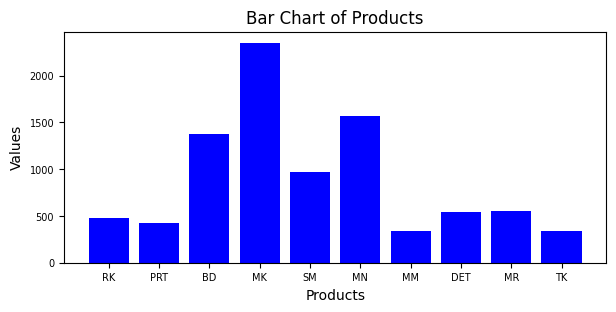

In [ ]:
top_5_items = allSupportList[:5]
top_10_items = all_item_sold_list[:10]

fig1, ax1 = plt.subplots(figsize=(7, 3))
labels = [list(item.keys())[0] for item in top_10_items]
values = [list(item.values())[0] for item in top_10_items]
ax1.bar(labels, values, color='blue')
ax1.set_xlabel('Products')
ax1.set_ylabel('Values')
ax1.set_title('Bar Chart of Products')
ax1.tick_params(axis='both', which='major', labelsize=7)

> Pie Chart Top 5 Barang berdasarkan nilai support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Pie Chart of Products')

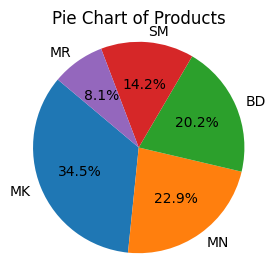

In [ ]:
# Create a pie chart
fig2, ax2 = plt.subplots(figsize=(3, 3))
labels = [list(item.keys())[0] for item in top_5_items]
values = [list(item.values())[0] for item in top_5_items]
ax2.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
ax2.axis('equal')
ax2.set_title('Pie Chart of Products')

6. Apriori Model
> Proses Mode Apriori untuk mendapatkan rules terbaik

In [ ]:
# Apriori Model Rules
frequent_items = apriori(data_frame, min_support=0.06, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
data_frame = rules

data_frame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(MR),(MK),0.115772,0.493079,0.073826,0.637681,1.293264,0.016741,1.399102,0.256453
5,(DET),(MK),0.112836,0.493079,0.070260,0.622677,1.262834,0.014623,1.343466,0.234601
9,(MN),(MK),0.328020,0.493079,0.187710,0.572251,1.160566,0.025970,1.185089,0.205886
7,(DET),(SM),0.112836,0.203440,0.060612,0.537175,2.640463,0.037657,1.721082,0.700297
1,(BD),(MK),0.289220,0.493079,0.153733,0.531545,1.078011,0.011125,1.082112,0.101812
12,(SM),(MK),0.203440,0.493079,0.104866,0.515464,1.045399,0.004554,1.046199,0.054518
8,(MK),(MN),0.493079,0.328020,0.187710,0.380689,1.160566,0.025970,1.085044,0.272925
2,(SM),(BD),0.203440,0.289220,0.067743,0.332990,1.151338,0.008905,1.065621,0.165016
0,(MK),(BD),0.493079,0.289220,0.153733,0.311782,1.078011,0.011125,1.032784,0.142756
6,(SM),(DET),0.203440,0.112836,0.060612,0.297938,2.640463,0.037657,1.263656,0.779952


7. Rules
> Menghilangkan frozen set untuk mendapatkan data barang

In [ ]:
data_frame = data_frame.values.tolist()
data_frame = [
    [list(item) if isinstance(item, frozenset) else item for item in sublist]
    for sublist in data_frame
]

data_frame = [
    [str(item) if isinstance(item, float) else item for item in sublist]
    for sublist in data_frame
]

data_frame = [
    [item[0] if isinstance(item, list) else item for item in sublist]
    for sublist in data_frame
]



print(data_frame[:5])

[['MR', 'MK', '0.11577181208053691', '0.49307885906040266', '0.0738255033557047', '0.6376811594202899', '1.2932640442858114', '0.016740870343678223', '1.3991023489932888', '0.25645269104709345'], ['DET', 'MK', '0.11283557046979865', '0.49307885906040266', '0.07026006711409397', '0.6226765799256506', '1.262833659330286', '0.01462323276541598', '1.3434658809138098', '0.23460146078120048'], ['MN', 'MK', '0.32802013422818793', '0.49307885906040266', '0.18770973154362416', '0.5722506393861893', '1.1605661627364314', '0.025969938009549137', '1.1850891844985503', '0.20588649662781872'], ['DET', 'SM', '0.11283557046979865', '0.20343959731543623', '0.06061241610738255', '0.5371747211895911', '2.6404629594144025', '0.03765719308814919', '1.7210823158405433', '0.7002969398022039'], ['BD', 'MK', '0.28921979865771813', '0.49307885906040266', '0.15373322147651006', '0.5315445975344452', '1.0780113317925286', '0.011125053136683022', '1.082111847299852', '0.1018120176141653']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> Hasil proses apriori menghasilkan pengetahuan baru berupa rules

In [ ]:
apriori_rules = []
for index, rule in enumerate(data_frame):
        apriori_rules.append([rule[0], rule[1]])
        print(f"- Pelanggan membeli barang {rule[0]} juga cenderung membeli {rule[1]}")

- Pelanggan membeli barang MR juga cenderung membeli MK
- Pelanggan membeli barang DET juga cenderung membeli MK
- Pelanggan membeli barang MN juga cenderung membeli MK
- Pelanggan membeli barang DET juga cenderung membeli SM
- Pelanggan membeli barang BD juga cenderung membeli MK
- Pelanggan membeli barang SM juga cenderung membeli MK
- Pelanggan membeli barang MK juga cenderung membeli MN
- Pelanggan membeli barang SM juga cenderung membeli BD
- Pelanggan membeli barang MK juga cenderung membeli BD
- Pelanggan membeli barang SM juga cenderung membeli DET
- Pelanggan membeli barang BD juga cenderung membeli SM
- Pelanggan membeli barang MK juga cenderung membeli SM
- Pelanggan membeli barang MK juga cenderung membeli MR
- Pelanggan membeli barang MK juga cenderung membeli DET


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
